In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

In [4]:
# Load the data into pandas DataFrame
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


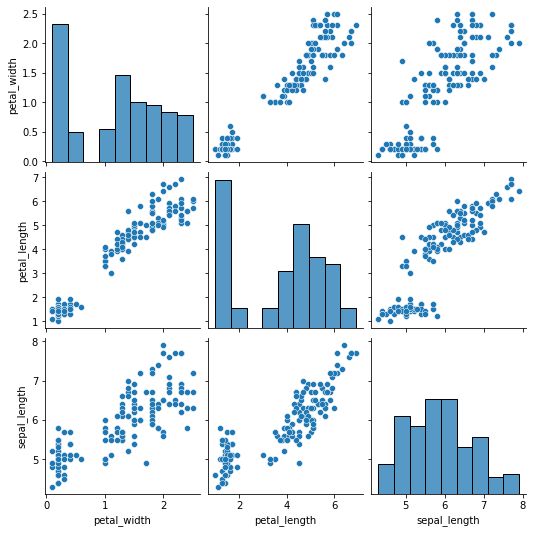

In [5]:
# Linear relatioship between x and y
sns.pairplot(iris[['petal_width', 'petal_length', 'sepal_length']].dropna(how = 'any', axis = 0))

In [7]:
# Multiple linear regression 
X = iris[['petal_length', 'sepal_length']]
X = sm.add_constant(X) # Another way to add a consstant row to an intercept 
y = iris['petal_width']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output 

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     962.1
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           3.60e-85
Time:                        11:10:35   Log-Likelihood:                 26.792
No. Observations:                 150   AIC:                            -47.58
Df Residuals:                     147   BIC:                            -38.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0090      0.182     -0.049   

# Are the residuals normally distributed?

In [ ]:
# JB test: Tests for normal distribution of residuals 
## H0: The null hyphotesisfor the test is that teh data are the normally distributed (In this case residuals)

# Unfortunately, with the small samples teh Jarque Bera test is prone rejecting the null hypothesis
## That the distribution is normal when it is in fact true

In [12]:
res = results.resid

C:\Users\USUARIO\.atom\Anacondax3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


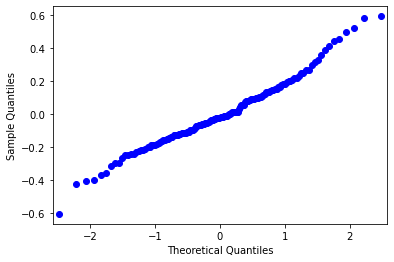

In [14]:
sm.qqplot(res)
plt.show()